In [1]:
import numpy as np

In [2]:
import pandas  as pd

In [5]:
df = pd.read_csv(r"uber.csv")

In [7]:
df.shape

(200000, 9)

In [8]:
df.head(10)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


In [9]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [11]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
df = df[~df['fare_amount'].isnull()]


In [13]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_month'] = df['pickup_datetime'].dt.month


In [14]:
import numpy as np

def haversine(lon1, lat1, lon2, lat2):
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Formula
    a = (np.sin(dlat / 2)**2 +
         np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2)

    d = 2 * 6371 * np.arcsin(np.sqrt(a))   # R = 6371 km

    return d


In [15]:
df['distance_km'] = haversine(
    df['pickup_longitude'], df['pickup_latitude'],
    df['dropoff_longitude'], df['dropoff_latitude']
)


In [16]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_month,distance_km
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000,200000.000000,200000.000000,200000.000000,199999.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,13.491335,3.048425,6.281795,20.855350
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997,6.515531,1.946946,3.438925,382.964642
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,1.000000,3.000000,1.215222
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,3.000000,6.000000,2.120992
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,5.000000,9.000000,3.875169
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,6.000000,12.000000,16409.239135


In [17]:
df.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_month,distance_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8,4.475450


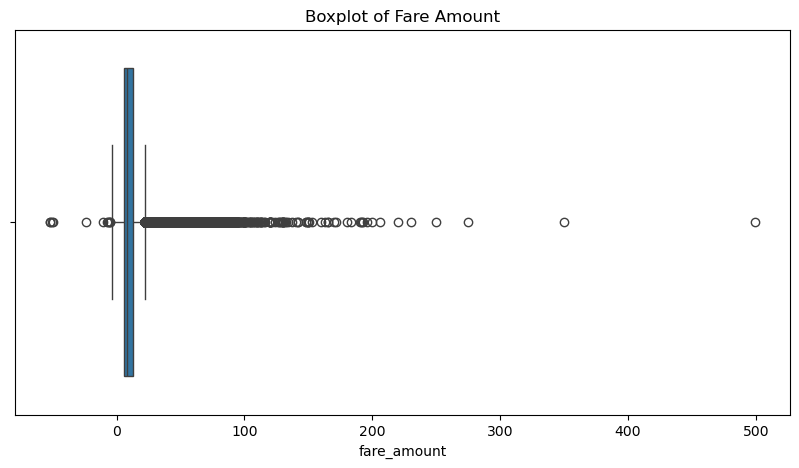

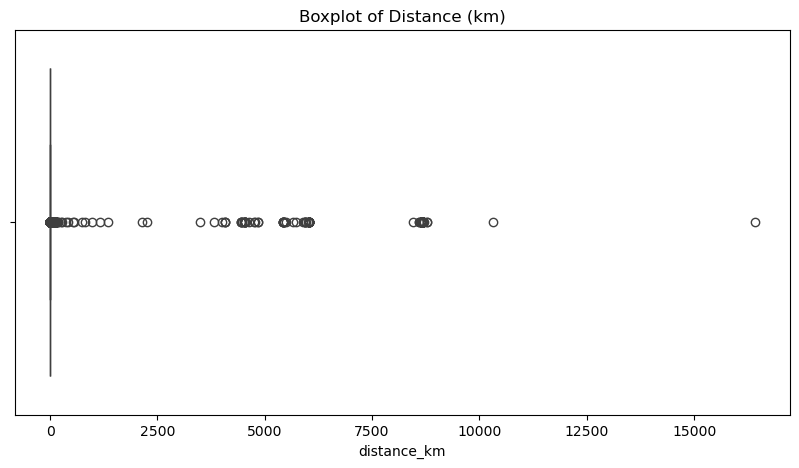

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x=df['fare_amount'])
plt.title("Boxplot of Fare Amount")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['distance_km'])
plt.title("Boxplot of Distance (km)")
plt.show()


In [19]:
Q1 = df['distance_km'].quantile(0.25)
Q3 = df['distance_km'].quantile(0.75)
IQR = Q3 - Q1

dist_low = Q1 - 1.5 * IQR
dist_high = Q3 + 1.5 * IQR

print("Distance normal range:", dist_low, "to", dist_high)

outliers_dist = df[(df['distance_km'] < dist_low) | (df['distance_km'] > dist_high)]
print("Number of distance outliers:", len(outliers_dist))


Distance normal range: -2.7746992481897665 to 7.86509054298472
Number of distance outliers: 16755


In [20]:
# Remove only extreme distances (say > 100 km)
df = df[df['distance_km'] <= 100]


In [21]:
# Select numeric columns
numeric_cols = ['fare_amount', 'distance_km', 'passenger_count',
                'pickup_hour', 'pickup_weekday', 'pickup_month']

corr = df[numeric_cols].corr()
print(corr)


                 fare_amount  distance_km  passenger_count  pickup_hour  \
fare_amount         1.000000     0.806288         0.010496    -0.021681   
distance_km         0.806288     1.000000         0.006724    -0.030164   
passenger_count     0.010496     0.006724         1.000000     0.013224   
pickup_hour        -0.021681    -0.030164         0.013224     1.000000   
pickup_weekday      0.007560     0.016371         0.033384    -0.087003   
pickup_month        0.023653     0.011317         0.009914    -0.004012   

                 pickup_weekday  pickup_month  
fare_amount            0.007560      0.023653  
distance_km            0.016371      0.011317  
passenger_count        0.033384      0.009914  
pickup_hour           -0.087003     -0.004012  
pickup_weekday         1.000000     -0.008767  
pickup_month          -0.008767      1.000000  


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [23]:
features = ['distance_km', 'passenger_count', 'pickup_hour', 'pickup_weekday', 'pickup_month']
X = df[features]
y = df['fare_amount']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [26]:
y_pred = lr_model.predict(X_test)


In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Linear Regression R²: {r2_score(y_test, y_pred):.4f}")
print(f"Linear Regression RMSE: {rmse:.2f}")


Linear Regression R²: 0.6734
Linear Regression RMSE: 5.59


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [30]:
rf_model = RandomForestRegressor(
    n_estimators=100,   # number of trees
    max_depth=10,       # depth of each tree
    random_state=42,
    n_jobs=-1           # use all CPU cores
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [31]:
y_pred_rf = rf_model.predict(X_test)


In [32]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest R²: {r2_rf:.4f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")


Random Forest R²: 0.7409
Random Forest RMSE: 4.98


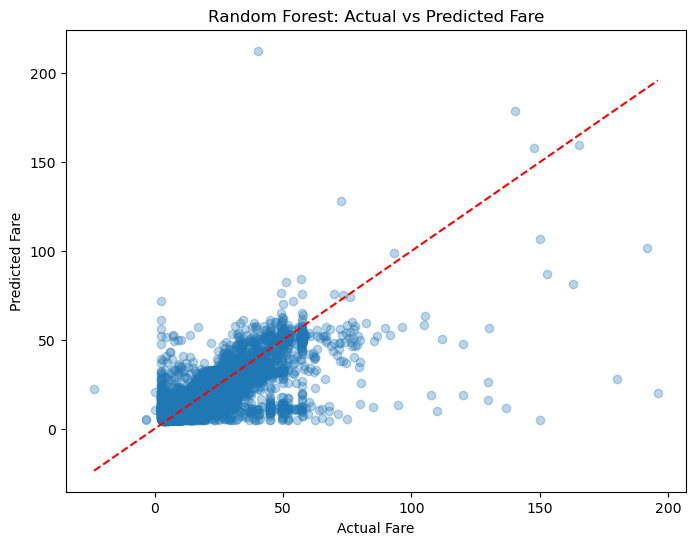

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Random Forest: Actual vs Predicted Fare")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [34]:
import joblib

# Save the trained model
joblib.dump(rf_model, "uber_fare_rf_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [36]:
import pandas as pd
import joblib

# Load the saved model
loaded_model = joblib.load("uber_fare_rf_model.pkl")

# Feature names must match training
features = ['distance_km', 'passenger_count', 'pickup_hour', 'pickup_weekday', 'pickup_month']

# Example input (wrap in DataFrame to avoid warning)
example_input = pd.DataFrame([[5, 2, 14, 3, 7]], columns=features)

# Predict
predicted_fare = loaded_model.predict(example_input)
print("Predicted Fare:", predicted_fare[0])


Predicted Fare: 15.958906978591312
